In [1]:
from utils.obj_detection import detect_objects
from utils.ocr_detection import get_ocr_text
from utils.gpt import get_gpt_formatted_text
import matplotlib.pyplot as plt
import cv2 as cv
import time
import numpy as np
import os
from dotenv import load_dotenv
load_dotenv()

[2024/10/20 20:20:10] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/blank/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/blank/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_lengt

True

In [19]:
combined_text = ""

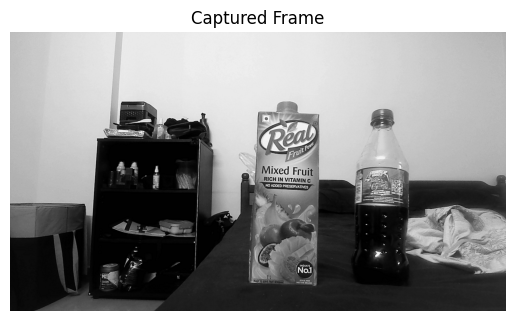

[2024/10/20 18:38:29] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.020692825317382812
[2024/10/20 18:38:29] ppocr DEBUG: cls num  : 3, elapsed : 0.004480600357055664
[2024/10/20 18:38:29] ppocr DEBUG: rec_res num  : 3, elapsed : 0.004791259765625
mixed fruit rich in vitamin a no added preservatives


In [50]:
cap = cv.VideoCapture(2)

def preprocess_frame(frame):
    # Convert to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv.GaussianBlur(gray, (5, 5), 0)
    
    # Apply sharpening kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened = cv.filter2D(blurred, -1, kernel)
    
    # Convert back to BGR
    preprocessed_frame = cv.cvtColor(sharpened, cv.COLOR_GRAY2BGR)
    
    return preprocessed_frame
if not cap.isOpened():
    print("Error: Could not open camera.")
else:
    # Set the camera resolution to the highest available
    cap.set(cv.CAP_PROP_FRAME_WIDTH, 1920)
    cap.set(cv.CAP_PROP_FRAME_HEIGHT, 1080)

    # Allow the camera to warm up and focus
    time.sleep(2)  # Wait for 2 seconds

    # Capture multiple frames to allow the camera to adjust its focus
    for _ in range(10):
        ret, frame = cap.read()
        img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        num, img = detect_objects(img)

    # Capture the final frame with the most detail
    ret, frame = cap.read()

    if ret:
        # Preprocess the frame
        preprocessed_frame = preprocess_frame(frame)

        # Convert the frame from BGR to RGB (OpenCV uses BGR by default)
        frame_rgb = cv.cvtColor(preprocessed_frame, cv.COLOR_BGR2RGB)

        # Display the frame using Matplotlib
        plt.imshow(frame_rgb)
        plt.title('Captured Frame')
        plt.axis('off')  # Hide the axis
        plt.show()

        # Extract text using OCR (assuming get_ocr_text is defined)
        text = get_ocr_text(frame_rgb)
        combined_text = combined_text + " " + text
        print(text)
    else:
        print("Error: Could not read frame.")

    # Release the camera
    cap.release()

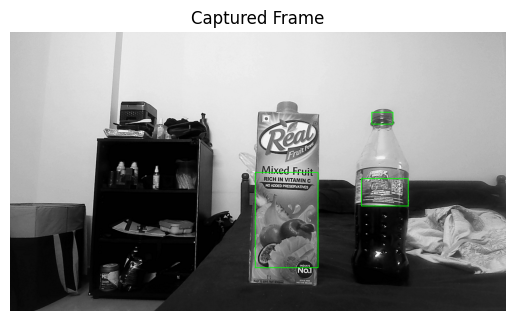

3


In [51]:
frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
num, img = detect_objects(frame_rgb)
plt.imshow(img)
plt.title('Captured Frame')
plt.axis('off')  # Hide the axis
plt.show()
print(num)

In [3]:
frame = cv.imread( 'img2.jpg')
text = get_ocr_text(frame)
print(text)

[2024/10/20 20:20:17] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.015755176544189453
[2024/10/20 20:20:17] ppocr DEBUG: cls num  : 4, elapsed : 0.004155635833740234
[2024/10/20 20:20:17] ppocr DEBUG: rec_res num  : 4, elapsed : 0.005568265914916992



In [52]:
print(combined_text)

a not just taste hat oath bus shake well before serving don't buy if the pack a puffed leaking or seal is broken keep away box directs real fruit pow mixed fruit rich in vitamin a no added preservatives swiss 1L let carol final real fruit mixed fruit rich in vitamin a no added preservatives on real fruit mixed fruit rich in vitamin no added preservatives no a mixed fruit rich in vitamin a no added preservatives mixed fruit rich in vitamin a no added preservatives mixed fruit rich in vitamin a no added preservatives


In [53]:
values = get_gpt_formatted_text(combined_text)
print(values)

{'productname': 'Real Fruit Mixed Fruit', 'price': 'NA', 'net_weight': '1L', 'shelf_life': 'NA', 'mfg_date': 'NA', 'estimates': {'price': 150.0, 'shelf_life': 90}, 'metadata': {'flavor': 'mixed fruit', 'vitamin_a': 'rich in', 'preservatives': 'no added', 'manufacturer': 'Swiss'}}


True